# London Bike Sharing

Metadata:
"timestamp" - timestamp field for grouping the data
"cnt" - the count of a new bike shares
"t1" - real temperature in C
"t2" - temperature in C "feels like"
"hum" - humidity in percentage
"windspeed" - wind speed in km/h
"weathercode" - category of the weather
"isholiday" - boolean field - 1 holiday / 0 non holiday
"isweekend" - boolean field - 1 if the day is weekend
"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

"weathe_code" category description:
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv("london_merged.csv")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [7]:
df["time"] = pd.to_datetime(df["timestamp"])
df = df.set_index("time")
df = df.drop("timestamp",axis=1)

In [8]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
time,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [9]:
df.isna().sum()

cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [10]:
df.dtypes

cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [11]:
df = df.astype({"weather_code":int,"is_holiday":int,"is_weekend":int,"season":int})
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
time,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3


In [46]:
df.shape

(17414, 9)

In [14]:
weathercode = {1:"Clear",2:"Scattered Clouds",3:"Broken Clouds",
               4:"Cloudy",7:"Light Rain",10:"Rain Thunderstorm",
               26:"Snowfall",94:"Freezing Fog"}

In [13]:
seasons = {0:"Spring",1:"Summer",2:"Fall",3:"Winter"}

In [16]:
df["weather_code"] = df["weather_code"].replace(weathercode)
df["season"] = df["season"].replace(seasons)
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
time,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Broken Clouds,0,1,Winter
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,Clear,0,1,Winter
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Clear,0,1,Winter
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Clear,0,1,Winter
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,Clear,0,1,Winter


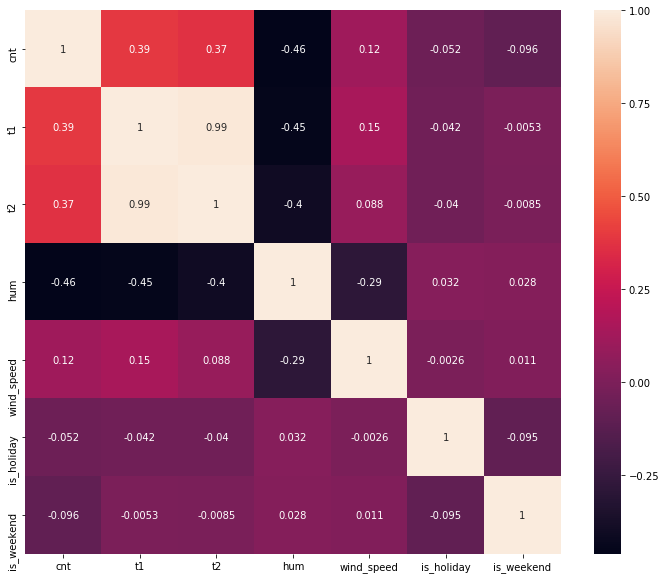

In [26]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)
plt.ylim(7,0);

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0


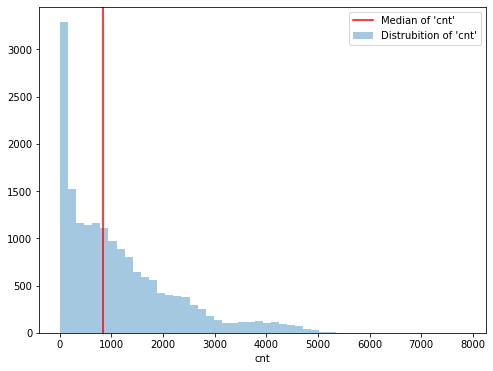

In [33]:
plt.figure(figsize=(8,6))
sns.distplot(df["cnt"],kde=False,bins=50,label="Distrubition of 'cnt'")
plt.axvline(df["cnt"].median(),c="r",label="Median of 'cnt'")
plt.legend();

In [34]:
cat = [] # categorical features
con = [] # continuous feature

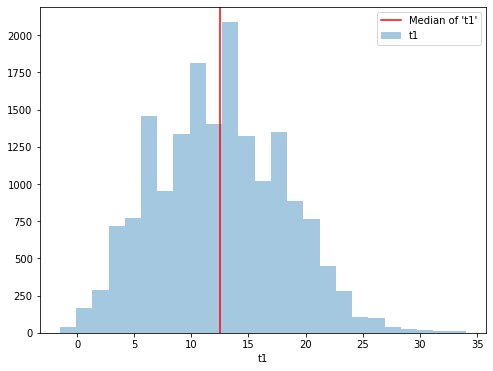

In [38]:
plt.figure(figsize=(8,6))
sns.distplot(df["t1"],kde=False,bins=25,label="t1")
plt.axvline(df["t1"].median(),c="r",label="Median of 't1'")
plt.legend();

In [39]:
con.append("t1")

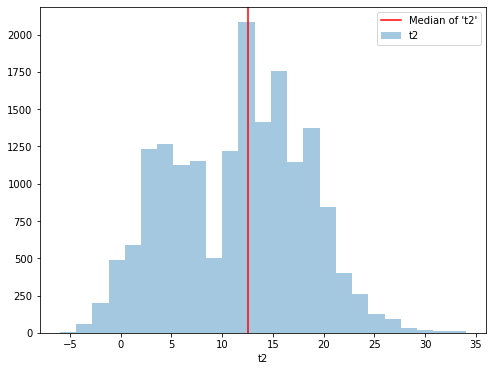

In [40]:
plt.figure(figsize=(8,6))
sns.distplot(df["t2"],kde=False,bins=25,label="t2")
plt.axvline(df["t2"].median(),c="r",label="Median of 't2'")
plt.legend();

In [41]:
con.append("t2")

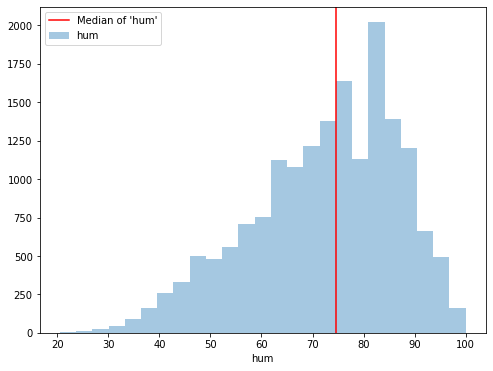

In [42]:
plt.figure(figsize=(8,6))
sns.distplot(df["hum"],kde=False,bins=25,label="hum")
plt.axvline(df["hum"].median(),c="r",label="Median of 'hum'")
plt.legend();

In [43]:
con.append("hum")

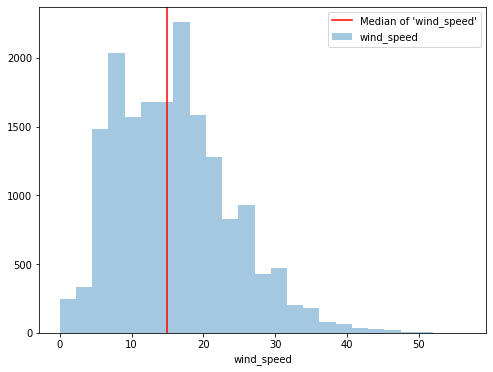

In [44]:
plt.figure(figsize=(8,6))
sns.distplot(df["wind_speed"],kde=False,bins=25,label="wind_speed")
plt.axvline(df["wind_speed"].median(),c="r",label="Median of 'wind_speed'")
plt.legend();

In [45]:
con.append("wind_speed")

Clear                6150
Scattered Clouds     4034
Broken Clouds        3551
Light Rain           2141
Cloudy               1464
Snowfall               60
Rain Thunderstorm      14
Name: weather_code, dtype: int64


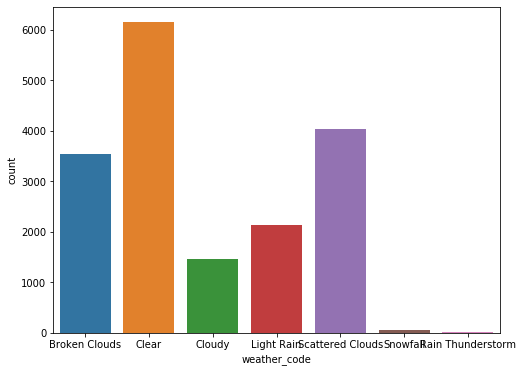

In [48]:
print(df["weather_code"].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x="weather_code",data=df);

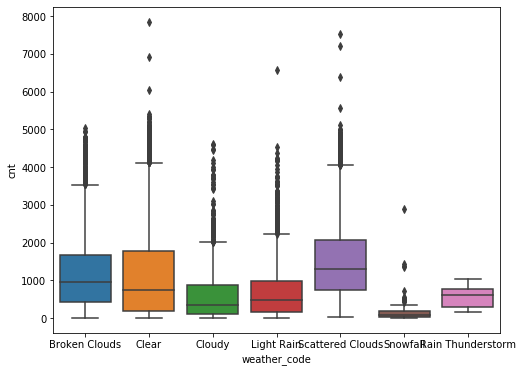

In [50]:
plt.figure(figsize=(8,6))
sns.boxplot(x="weather_code",y="cnt",data=df)
cat.append("weather_code");

0    17030
1      384
Name: is_holiday, dtype: int64


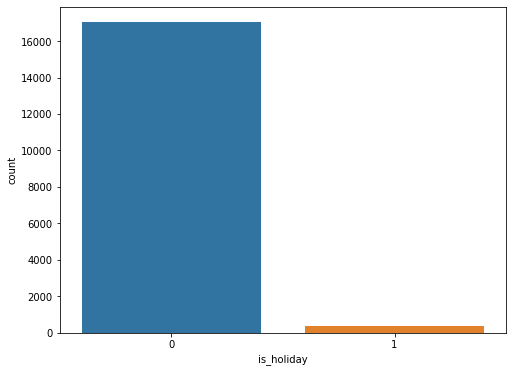

In [51]:
print(df["is_holiday"].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x="is_holiday",data=df);

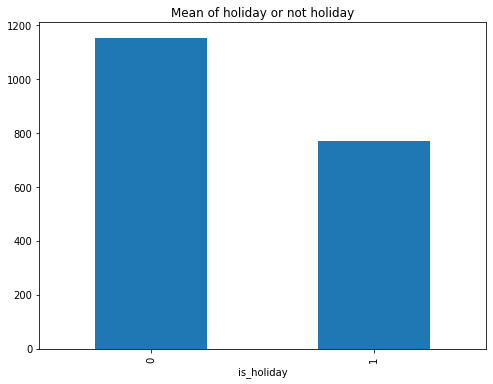

In [53]:
plt.figure(figsize=(8,6))
df.groupby("is_holiday").mean()["cnt"].plot.bar()
plt.title("Mean of holiday or not holiday")
cat.append("is_holiday");

0    12444
1     4970
Name: is_weekend, dtype: int64


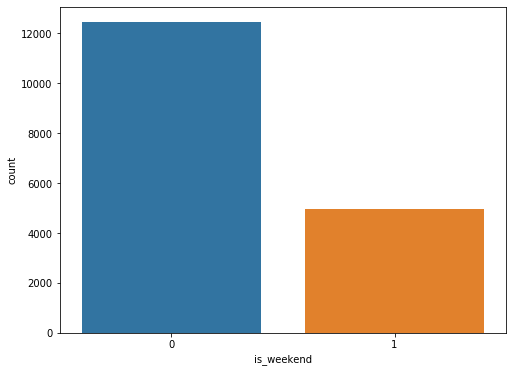

In [54]:
print(df["is_weekend"].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x="is_weekend",data=df);

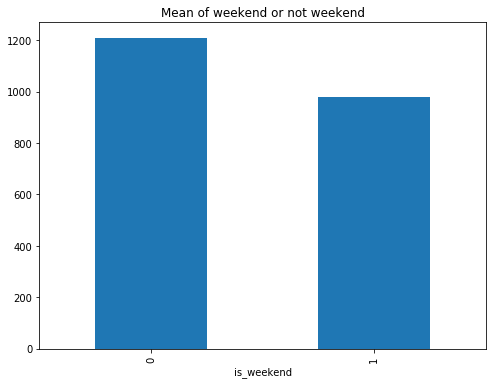

In [55]:
plt.figure(figsize=(8,6))
df.groupby("is_weekend").mean()["cnt"].plot.bar()
plt.title("Mean of weekend or not weekend")
cat.append("is_weekend");

Spring    4394
Summer    4387
Winter    4330
Fall      4303
Name: season, dtype: int64


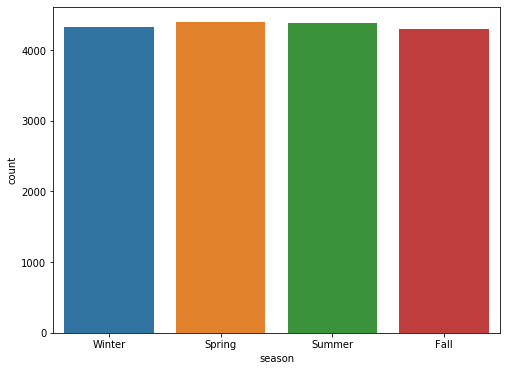

In [57]:
print(df["season"].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x="season",data=df);

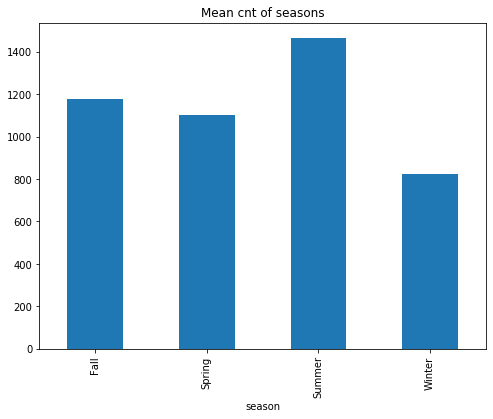

In [58]:
plt.figure(figsize=(8,6))
df.groupby("season").mean()["cnt"].plot.bar()
plt.title("Mean cnt of seasons")
cat.append("season");

In [59]:
print(f"Continuous features are : {con}")
print(f"Categorical features are : {cat}")

Continuous features are : ['t1', 't2', 'hum', 'wind_speed']
Categorical features are : ['weather_code', 'is_holiday', 'is_weekend', 'season']


In [60]:
df = pd.get_dummies(df,columns=cat,drop_first=True)

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [73]:
X = df.drop("cnt",axis=1).values
y = df["cnt"].values

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [84]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
lr_tr_preds = lin_reg.predict(X_train)
lr_ts_preds = lin_reg.predict(X_test)
print(f"RMSE of Linear Regression train set : {np.sqrt(mean_squared_error(y_train,lr_tr_preds))}")
print(f"RMSE Squared Error of Linear Regression test set : {np.sqrt(mean_squared_error(y_test,lr_ts_preds))}")

RMSE of Linear Regression train set : 911.753716605046
RMSE Squared Error of Linear Regression test set : 923.1411066964579


In [85]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dtr_tr_preds = dtr.predict(X_train)
dtr_ts_preds = dtr.predict(X_test)
print(f"RMSE of Decision Tree Regression train set : {np.sqrt(mean_squared_error(y_train,dtr_tr_preds))}")
print(f"RMSE of Decision Tree Regression test set : {np.sqrt(mean_squared_error(y_test,dtr_ts_preds))}")

RMSE of Decision Tree Regression train set : 207.5449741722641
RMSE of Decision Tree Regression test set : 1221.653349091421


In [86]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)
knn_tr_preds = knn.predict(X_train)
knn_ts_preds = knn.predict(X_test)
print(f"RMSE of KNeighbors Regression train set : {np.sqrt(mean_squared_error(y_train,knn_tr_preds))}")
print(f"RMSE of KNeighbors Regression test set : {np.sqrt(mean_squared_error(y_test,knn_ts_preds))}")

RMSE of KNeighbors Regression train set : 804.0848169416712
RMSE of KNeighbors Regression test set : 968.8799462759678


In [87]:
X_train.shape

(13931, 15)

In [99]:
model = Sequential()

model.add(Dense(units=32,activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(units=64,activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(units=128,activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(units=64,activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(units=16,activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(units=1))

model.compile(loss="mse",optimizer="adam")

In [100]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),
           epochs=200)

Train on 13931 samples, validate on 3483 samples
Epoch 1/200
13931/13931 [==============================] - 2s 165us/sample - loss: 1451905.2151 - val_loss: 1114362.7457
Epoch 2/200
13931/13931 [==============================] - 1s 67us/sample - loss: 1212960.1250 - val_loss: 1113171.8029
Epoch 3/200
13931/13931 [==============================] - 1s 72us/sample - loss: 1202532.3277 - val_loss: 1173119.2567
Epoch 4/200
13931/13931 [==============================] - 1s 56us/sample - loss: 1193233.5322 - val_loss: 1262621.6287
Epoch 5/200
13931/13931 [==============================] - 1s 57us/sample - loss: 1182041.2094 - val_loss: 1235572.3454
Epoch 6/200
13931/13931 [==============================] - 1s 56us/sample - loss: 1174588.9690 - val_loss: 1084221.0808
Epoch 7/200
13931/13931 [==============================] - 1s 59us/sample - loss: 1163500.7941 - val_loss: 1175873.3305
Epoch 8/200
13931/13931 [==============================] - 1s 71us/sample - loss: 1172638.6163 - val_loss: 129

13931/13931 [==============================] - 1s 72us/sample - loss: 1052114.0335 - val_loss: 962880.1369
Epoch 69/200
13931/13931 [==============================] - 1s 68us/sample - loss: 1022390.6311 - val_loss: 965820.0525
Epoch 70/200
13931/13931 [==============================] - 1s 66us/sample - loss: 1043308.7710 - val_loss: 985335.5620
Epoch 71/200
13931/13931 [==============================] - 1s 66us/sample - loss: 1047402.1893 - val_loss: 992665.0298
Epoch 72/200
13931/13931 [==============================] - 1s 73us/sample - loss: 1045238.8924 - val_loss: 988057.7038
Epoch 73/200
13931/13931 [==============================] - 1s 65us/sample - loss: 1055659.1672 - val_loss: 907869.2553
Epoch 74/200
13931/13931 [==============================] - 1s 62us/sample - loss: 1048041.7073 - val_loss: 914153.9913
Epoch 75/200
13931/13931 [==============================] - 1s 67us/sample - loss: 1039005.6571 - val_loss: 989071.6784
Epoch 76/200
13931/13931 [===========================

Epoch 136/200
13931/13931 [==============================] - 1s 61us/sample - loss: 1033173.5210 - val_loss: 954839.4022
Epoch 137/200
13931/13931 [==============================] - 1s 62us/sample - loss: 1013627.3963 - val_loss: 955043.9571
Epoch 138/200
13931/13931 [==============================] - 1s 61us/sample - loss: 1020452.3622 - val_loss: 927119.0715
Epoch 139/200
13931/13931 [==============================] - 1s 64us/sample - loss: 1016141.3105 - val_loss: 982536.3644
Epoch 140/200
13931/13931 [==============================] - 1s 68us/sample - loss: 1019237.3807 - val_loss: 920031.0745
Epoch 141/200
13931/13931 [==============================] - 1s 65us/sample - loss: 1029047.0861 - val_loss: 1023795.4984
Epoch 142/200
13931/13931 [==============================] - 1s 66us/sample - loss: 1035409.6533 - val_loss: 986400.7851
Epoch 143/200
13931/13931 [==============================] - 1s 65us/sample - loss: 1031541.8924 - val_loss: 926894.3865
Epoch 144/200
13931/13931 [====

In [101]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             multiple                  512       
_________________________________________________________________
dropout_30 (Dropout)         multiple                  0         
_________________________________________________________________
dense_37 (Dense)             multiple                  2112      
_________________________________________________________________
dropout_31 (Dropout)         multiple                  0         
_________________________________________________________________
dense_38 (Dense)             multiple                  8320      
_________________________________________________________________
dropout_32 (Dropout)         multiple                  0         
_________________________________________________________________
dense_39 (Dense)             multiple                 

In [104]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,val_loss
0,1.451905e+06,1.114363e+06
1,1.212960e+06,1.113172e+06
2,1.202532e+06,1.173119e+06
3,1.193234e+06,1.262622e+06
4,1.182041e+06,1.235572e+06


In [106]:
losses["rmse_loss"] = np.sqrt(losses["loss"])
losses["rmse_val_loss"] = np.sqrt(losses["val_loss"])
losses.head()

,loss,val_loss,rmse_loss,rmse_val_loss
0,1.451905e+06,1.114363e+06,1204.950296,1055.633812
1,1.212960e+06,1.113172e+06,1101.344689,1055.069573
2,1.202532e+06,1.173119e+06,1096.600350,1083.106300
3,1.193234e+06,1.262622e+06,1092.352293,1123.664375
4,1.182041e+06,1.235572e+06,1087.217186,1111.563019


<Figure size 720x720 with 0 Axes>

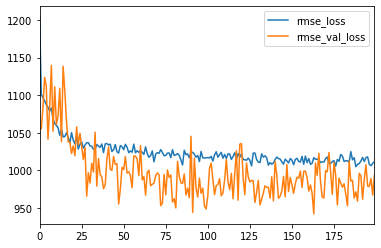

In [109]:
plt.figure(figsize=(10,10))
losses[["rmse_loss","rmse_val_loss"]].plot();

In [110]:
losses[["rmse_loss","rmse_val_loss"]].tail()

,rmse_loss,rmse_val_loss
195,1017.716330,978.762585
196,1007.737241,978.405907
197,1006.095175,988.900054
198,1009.213703,966.926989
199,1011.470270,993.467975
